## Exercise 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist

In [3]:
def sort_into_clusters(data, cluster_centers):
    n_clusters = len(cluster_centers)
    clusters = [[] for _ in range(n_clusters)]

    for point in data:
        distances = []
        for center in cluster_centers:
            distances.append(np.linalg.norm(point-center))
        closest_cluster_idx = np.argmin(distances)
        clusters[closest_cluster_idx].append(point)

    clusters = [np.asarray(clusters[i]) for i in range(len(clusters))]
    return clusters

def compute_centroids(clusters):
    return [np.array(np.mean(clusters[i], axis=0)) for i in range(len(clusters))]

In [4]:
A1 = [2, 10]
A2 = [2, 5]
A3 = [8, 4]
A4 = [5, 8]
A5 = [7, 5]
A6 = [6, 4]
A7 = [1, 2]
A8 = [4, 9]

data = np.array([A1, A2, A3, A4, A5, A6, A7, A8])

In [5]:
c1_center, c2_center, c3_center = A1, A4, A7
cluster_centers = np.asarray([c1_center, c2_center, c3_center])
clusters = sort_into_clusters(data, cluster_centers)

original data


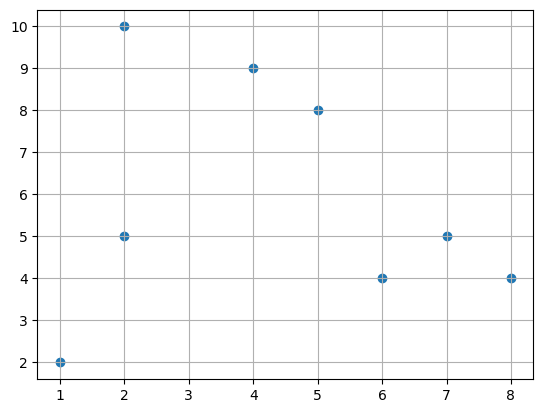

In [6]:
print("original data")
plt.scatter(data[:,0], data[:,1])
plt.grid()

assigned to closest initial centroids


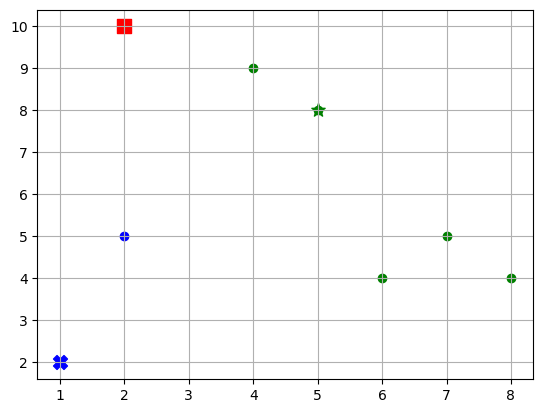

In [7]:
print("assigned to closest initial centroids")
plt.scatter(clusters[0][:, 0], clusters[0][:, 1], c='r')
plt.scatter(clusters[1][:, 0], clusters[1][:, 1], c='g')
plt.scatter(clusters[2][:, 0], clusters[2][:, 1], c='b')

plt.scatter(c1_center[0], c1_center[1], s=100, c='r', marker="s")
plt.scatter(c2_center[0], c2_center[1], s=100, c='g', marker="*")
plt.scatter(c3_center[0], c3_center[1], s=100, c='b', marker="X")
plt.grid()

In [8]:
cluster_centers = compute_centroids(clusters)
clusters = sort_into_clusters(data, cluster_centers)

with re-computed centroids


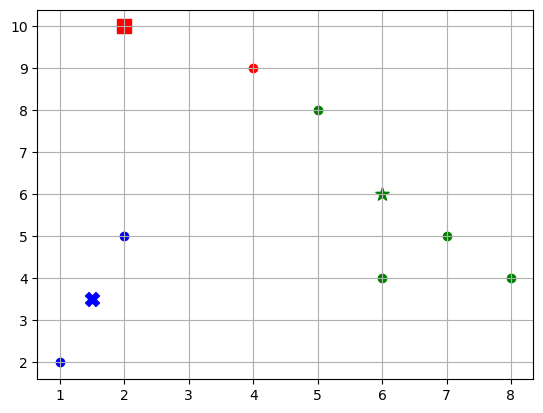

In [9]:
print("with re-computed centroids")
plt.scatter(clusters[0][:, 0], clusters[0][:, 1], c='r')
plt.scatter(clusters[1][:, 0], clusters[1][:, 1], c='g')
plt.scatter(clusters[2][:, 0], clusters[2][:, 1], c='b')

plt.scatter(cluster_centers[0][0], cluster_centers[0][1], s=100, c='r', marker="s")
plt.scatter(cluster_centers[1][0], cluster_centers[1][1], s=100, c='g', marker="*")
plt.scatter(cluster_centers[2][0], cluster_centers[2][1], s=100, c='b', marker="X")
plt.grid()

## Exercise 2
### 1.

First, the input we are dealing with is a 28x28 grayscale image (28x28x1). 
Layers:
1. The first layer is a 2d convolution, which sweeps across the pixels with a square filter (3x3 in this case), computing weighted averages of the pixels covered by the filter at each step. The filter is a 3x3 grid of weights, 
and we are generating 32 of them, resulting in $w_1 = 32 \cdot (3\times 3 + 1) = \underline{320}$ weights for the first layer. The added $1$ is a bias.\
The output of the first layer is $26\times 26 \times 32$, since the convolution cuts off 2 rows and 2 columns.
2. Second layer is another convolution, 64 3x3 filters. these filters must have depth 32 to operate on the entire input data (32 channels). $w_2 = 64 \cdot (3 \times 3 \times 32 + 1) = \underline{18,496}$. \
The output of this layer is now $64 \times24 \times 24 $.
3. The third layer is pool, which compresses/downscales the image by taking max values of image sub-squares. This has no training weights. \
The pool filter is 2x2, and reduces the data to $12 \times 12 \times 64$
4. Flatten the images to be 1-dimensional. no weights\
Flattens input data to $12 \cdot 12 \cdot 64 = 9,216 \times 1$
5. Here we have the fully connected layer where the input data gets uniquely weighted into nodes. We have 256 nodes with an input of size 9216. This layer is fully connected giving us $w_3 = 9,216 \cdot 256 + 256 = 2,359,552$.
6. Another dense layer (output layer) with 10 nodes. The input from the previous layer has size 256, giving us $w_4 = 256 \cdot 10 + 10 = 2,570$ .

In total we get $W = 320 + 18,496 + 2,359,552 + 2,570 = \underline{\underline{2,380,938}}$ weights

### 2/3.

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [11]:
# only first four digits (0, 1, 2, 3, 4)
X_train = X_train[y_train<5]
y_train = y_train[y_train<5]
X_test = X_test[y_test<5]
y_test = y_test[y_test<5]
print(X_train.shape)

(30596, 28, 28, 1)


In [12]:
input_shape = (28,28,1)
num_classes = 5
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers
.Adadelta(),metrics=['accuracy'])

In [13]:
scores = []

for num_epochs in (10, 20, 30, 40, 50, 60, 70, 80, 90, 100):
    model.fit(X_train,y_train,
              batch_size=128,
              epochs=num_epochs,
              verbose=0,
              validation_data=(X_test,y_test))
    score = model.evaluate(X_test,y_test ,verbose=0)
    scores.append(score)
    print(f"number of epochs: f{num_epochs}")
    print('test loss:',score[0])
    print('test accuracy:',score[1])
    print('----')

KeyboardInterrupt: 

In [ ]:
plt.plot(num_epochs, scores)

In [ ]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8n.pt')
video_path = "monkey.mp4"
cap = cv2.VideoCapture(video_path)
while cap.isOpened():
    success, frame = cap.read()
    if success:
        results = model(frame)
        annotated_frame = results[0].plot()
        cv2.imshow("YOLOv8 Inference", annotated_frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()